## 1. Fashion-MNIST Classification

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.autograd import Variable

import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import confusion_matrix

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
train_csv = pd.read_csv("/content/sample_data/fashion-mnist_train.csv")
test_csv = pd.read_csv("/content/sample_data/fashion-mnist_test.csv")

class FashionDataset(Dataset):
    def __init__(self, data, transform = None): 
        self.fashion_MNIST = list(data.values)
        self.transform = transform
        label = []
        image = []
        for i in self.fashion_MNIST:
            label.append(i[0])
            image.append(i[1:])
        self.labels = np.asarray(label)
        self.images = np.asarray(image).reshape(-1, 28, 28, 1).astype('float32')
    def __getitem__(self, index):
        label = self.labels[index]
        image = self.images[index]
        if self.transform is not None:
            image = self.transform(image)
        return image, label
    def __len__(self):
        return len(self.images)

train_set = FashionDataset(train_csv, transform=transforms.Compose([transforms.ToTensor()]))
test_set = FashionDataset(test_csv, transform=transforms.Compose([transforms.ToTensor()]))

train_loader = DataLoader(train_set, batch_size=100)
test_loader = DataLoader(train_set, batch_size=100)

#10 classes
def output_label(label):
    output_mapping = {
                 0: "T-shirt/Top",
                 1: "Trouser",
                 2: "Pullover",
                 3: "Dress",
                 4: "Coat", 
                 5: "Sandal", 
                 6: "Shirt",
                 7: "Sneaker",
                 8: "Bag",
                 9: "Ankle Boot"
                 }
    input = (label.item() if type(label) == torch.Tensor else label)
    return output_mapping[input]

a = next(iter(train_loader))
a[0].size()
image, label = next(iter(train_set))
demo_loader = torch.utils.data.DataLoader(train_set, batch_size=10)
batch = next(iter(demo_loader))
images, labels = batch
grid = torchvision.utils.make_grid(images, nrow=10)

In [ ]:
class FashionCNN(nn.Module):
    
    def __init__(self):
        super(FashionCNN, self).__init__()
        
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        
        self.fc1 = nn.Linear(in_features=64*6*6, out_features=600)
        self.drop = nn.Dropout2d(0.25)
        self.fc2 = nn.Linear(in_features=600, out_features=120)
        self.fc3 = nn.Linear(in_features=120, out_features=10)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        out = self.drop(out)
        out = self.fc2(out)
        out = self.fc3(out)
        return out

model = FashionCNN()
model.to(device)

error = nn.CrossEntropyLoss()

learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

Iteration: 500, Loss: 0.4552304446697235, Accuracy: 86.69499969482422%
Iteration: 1000, Loss: 0.30381983518600464, Accuracy: 90.57333374023438%
Iteration: 1500, Loss: 0.21417425572872162, Accuracy: 90.46499633789062%
Iteration: 2000, Loss: 0.2462569773197174, Accuracy: 91.36333465576172%
Iteration: 2500, Loss: 0.25830361247062683, Accuracy: 92.18000030517578%
Iteration: 3000, Loss: 0.1796366572380066, Accuracy: 93.8933334350586%


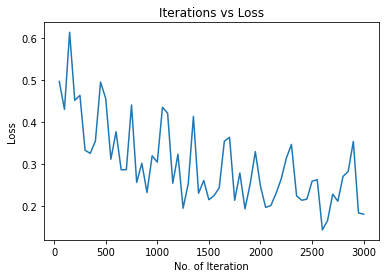

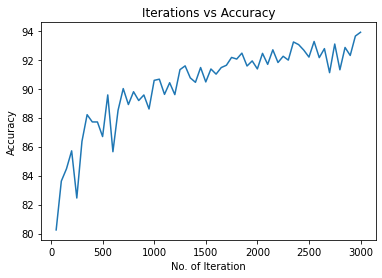

In [ ]:
num_epochs = 5
count = 0
# Lists for visualization of loss and accuracy 
loss_list = []
iteration_list = []
accuracy_list = []

# Lists for knowing classwise accuracy
predictions_list = []
labels_list = []

for epoch in range(num_epochs):
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        train = Variable(images.view(100, 1, 28, 28))
        labels = Variable(labels)
        outputs = model(train)
        loss = error(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        count += 1
    
        if not (count % 50):
            total = 0
            correct = 0
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                labels_list.append(labels)
                test = Variable(images.view(100, 1, 28, 28))
                outputs = model(test)
                predictions = torch.max(outputs, 1)[1].to(device)
                predictions_list.append(predictions)
                correct += (predictions == labels).sum()
                total += len(labels)
            accuracy = correct * 100 / total
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
        
        if not (count % 500):
            print("Iteration: {}, Loss: {}, Accuracy: {}%".format(count, loss.data, accuracy))

plt.plot(iteration_list, loss_list)
plt.xlabel("No. of Iteration")
plt.ylabel("Loss")
plt.title("Iterations vs Loss")
plt.show()

plt.plot(iteration_list, accuracy_list)
plt.xlabel("No. of Iteration")
plt.ylabel("Accuracy")
plt.title("Iterations vs Accuracy")
plt.show()

## 2. Activation Visualization

Start training...


100%|██████████| 938/938 [01:30<00:00, 10.31it/s]


Epoch 1 loss:0.8461499744132638


100%|██████████| 938/938 [01:30<00:00, 10.34it/s]


Epoch 2 loss:0.37698866633464023


100%|██████████| 938/938 [01:31<00:00, 10.29it/s]


Epoch 3 loss:0.31245735217767484


100%|██████████| 938/938 [01:30<00:00, 10.38it/s]


Epoch 4 loss:0.27664327639728975


100%|██████████| 938/938 [01:30<00:00, 10.38it/s]


Epoch 5 loss:0.25128461801802426


100%|██████████| 938/938 [01:30<00:00, 10.34it/s]


Epoch 6 loss:0.23197485472776616


100%|██████████| 938/938 [01:30<00:00, 10.40it/s]


Epoch 7 loss:0.21556883100380522


100%|██████████| 938/938 [01:30<00:00, 10.42it/s]


Epoch 8 loss:0.20449976945943288


100%|██████████| 938/938 [01:30<00:00, 10.39it/s]


Epoch 9 loss:0.19200384813442287


100%|██████████| 938/938 [01:30<00:00, 10.37it/s]


Epoch 10 loss:0.17963902709652174
Done!


100%|██████████| 157/157 [00:14<00:00, 10.63it/s]


Evaluation accuracy: 0.849


100%|██████████| 10000/10000 [00:47<00:00, 209.51it/s]


Evaluation accuracy: 0.849


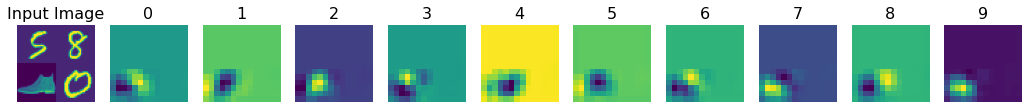

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm # Displays a progress bar

import torch
from torch import nn
from torch import optim, Tensor
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import Dataset, Subset, DataLoader, random_split
from PIL import Image
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"


MNIST_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.1307], [0.3081])
])
MNIST_train = datasets.MNIST('.', download=True, train = True, transform=MNIST_transform)
MNIST_test = datasets.MNIST('.', download=True, train = False, transform=MNIST_transform)
FASHION_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.2859], [0.3530])
])
FASHION_train = datasets.FashionMNIST('.', download=True, train=True, transform=MNIST_transform)
FASHION_test = datasets.FashionMNIST('.', download=True, train=False, transform=FASHION_transform)

class GridDataset(Dataset):
    def __init__(self, MNIST_dataset, FASHION_dataset): # pass in dataset
        assert len(MNIST_dataset) == len(FASHION_dataset)
        self.MNIST_dataset, self.FASHION_dataset = MNIST_dataset, FASHION_dataset
        self.targets = FASHION_dataset.targets
        torch.manual_seed(442) # Fix random seed for reproducibility
        N = len(MNIST_dataset)
        self.randpos = torch.randint(low=0,high=4,size=(N,)) # position of the FASHION-MNIST image
        self.randidx = torch.randint(low=0,high=N,size=(N,3)) # indices of MNIST images
    
    def __len__(self):
        return len(self.MNIST_dataset)
    
    def __getitem__(self,idx): # Get one Fashion-MNIST image and three MNIST images to make a new image
        idx1, idx2, idx3 = self.randidx[idx]
        x = self.randpos[idx]%2
        y = self.randpos[idx]//2
        p1 = self.FASHION_dataset.__getitem__(idx)[0]
        p2 = self.MNIST_dataset.__getitem__(idx1)[0]
        p3 = self.MNIST_dataset.__getitem__(idx2)[0]
        p4 = self.MNIST_dataset.__getitem__(idx3)[0]
        combo = torch.cat((torch.cat((p1,p2),2),torch.cat((p3,p4),2)),1)
        combo = torch.roll(combo, (x*28,y*28), dims=(0,1))
        return (combo,self.targets[idx])
trainset = GridDataset(MNIST_train, FASHION_train)
testset = GridDataset(MNIST_test, FASHION_test)

class PrintLayer(nn.Module):
    def __init__(self):
        super(PrintLayer, self).__init__()
    
    def forward(self, x):
        # print(x.shape)
        return x


class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # TODO: Design your own base module, define layers here
        self.base = nn.Sequential(
            # nn.Conv2d(1,32,5,1,2),
            # nn.ReLU(),
            PrintLayer(),
            nn.Conv2d(1, 32, 3, stride=1, padding=1),
            PrintLayer(),
            nn.ReLU(inplace=True),
            nn.Conv2d(32, 32, 3, stride=1, padding=1),
            PrintLayer(),
            nn.ReLU(inplace=True),
            #2
            nn.MaxPool2d(2, stride=2),
            #3
            nn.Conv2d(32,64, 3, stride=1, padding=1),
            nn.Conv2d(64, 64, 3, stride=1, padding=1),
            PrintLayer(),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 128, 3, stride=1, padding=1),
            PrintLayer(),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2, stride=2),
            PrintLayer(),
            #5
            nn.Conv2d(128, 128, 3, stride=1, padding=1),
            nn.Conv2d(128, 128, 3, stride=1, padding=1),

        )
        out_channel = 128 # TODO: Put the output channel number of your base module here
        self.avgpool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Linear(out_channel,10)
        self.conv = nn.Conv2d(out_channel,10,1) # 1x1 conv layer (substitutes fc)

    def transfer(self): # Copy weights of fc layer into 1x1 conv layer
        self.conv.weight = nn.Parameter(self.fc.weight.unsqueeze(2).unsqueeze(3))
        self.conv.bias = nn.Parameter(self.fc.bias)

    def visualize(self,x):
        x = self.base(x)
        x = self.conv(x)
        return x
        
    def forward(self,x):
        x = self.base(x)
        x = self.avgpool(x)
        x = x.view(x.size(0),-1)
        x = self.fc(x)
        return x
    
device = "cuda" if torch.cuda.is_available() else "cpu"
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)
testloader = DataLoader(testset, batch_size=64, shuffle=True)
evalloader = DataLoader(testset, batch_size=1, shuffle=False)
model = Network().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001) # TODO: Experiment with different optimizer
num_epoch = 10 # TODO: Choose an appropriate number of epochs

def train(model, loader, num_epoch = 10): # Train the model
    print("Start training...")
    model.train() # Set the model to training mode
    for i in range(num_epoch):
        running_loss = []
        for batch, label in tqdm(loader):
            batch = batch.to(device)
            label = label.to(device)
            optimizer.zero_grad() # Clear gradients from the previous iteration
            pred = model(batch) # This will call Network.forward() that you implement
            loss = criterion(pred, label) # Calculate the loss
            running_loss.append(loss.item())
            loss.backward() # Backprop gradients to all tensors in the network
            optimizer.step() # Update trainable weights
        print("Epoch {} loss:{}".format(i+1,np.mean(running_loss))) # Print the average loss for this epoch
    print("Done!")

def evaluate(model, loader, return_idx = False): # Evaluate accuracy on validation / test set
    model.eval() # Set the model to evaluation mode
    correct = 0
    corr_index = -1
    ind = 0
    base_img = None
    with torch.no_grad(): # Do not calculate grident to speed up computation
        for batch, label in tqdm(loader):
            batch = batch.to(device)
            label = label.to(device)
            pred = model(batch)
            correct += (torch.argmax(pred,dim=1)==label).sum().item()
            if return_idx and torch.argmax(pred[0]) == label[0] and corr_index == -1:
                corr_index =  ind
                base_img = batch[0]
            ind = ind + 1
    acc = correct/len(loader.dataset)
    print("Evaluation accuracy: {}".format(acc))
    return acc,corr_index, base_img

train(model, trainloader,num_epoch)
torch.save(model.state_dict(), "./model.pt")

# model = Network().to(device)
# model.load_state_dict(torch.load("./model.pt"))
# model.eval()

eval_acc,_,_ = evaluate(model, testloader,False)

model.transfer() # Copy the weights from fc layer to 1x1 conv layer
_,img_indx,base_img = evaluate(model, evalloader,True)
base_img = base_img.reshape([1,base_img.shape[0],base_img.shape[1],base_img.shape[2]])
# TODO: Choose a correctly classified image and visualize it
img_idx = 0
activation_layer = model.visualize(base_img)
fig = plt.figure(figsize=(3, 6))
plt.subplot(1, 11, 1)
plt.imshow(Tensor.cpu(base_img).numpy().reshape([base_img.shape[2],base_img.shape[3]]))
plt.title('Input Image', fontsize=16)
plt.axis('off')

plt.subplot(1, 11, 2)
plt.imshow(Tensor.cpu(activation_layer.detach()).numpy()[0][0])
plt.title('0', fontsize=16)
plt.axis('off')

plt.subplot(1, 11, 3)
plt.imshow(Tensor.cpu(activation_layer.detach()).numpy()[0][1])
plt.title('1', fontsize=16)
plt.axis('off')

plt.subplot(1, 11, 4)
plt.imshow(Tensor.cpu(activation_layer.detach()).numpy()[0][2])
plt.title('2', fontsize=16)
plt.axis('off')

plt.subplot(1, 11, 5)
plt.imshow(Tensor.cpu(activation_layer.detach()).numpy()[0][3])
plt.title('3', fontsize=16)
plt.axis('off')

plt.subplot(1, 11, 6)
plt.imshow(Tensor.cpu(activation_layer.detach()).numpy()[0][4])
plt.title('4', fontsize=16)
plt.axis('off')

plt.subplot(1, 11, 7)
plt.imshow(Tensor.cpu(activation_layer.detach()).numpy()[0][5])
plt.title('5', fontsize=16)
plt.axis('off')

plt.subplot(1, 11, 8)
plt.imshow(Tensor.cpu(activation_layer.detach()).numpy()[0][6])
plt.title('6', fontsize=16)
plt.axis('off')

plt.subplot(1, 11, 9)
plt.imshow(Tensor.cpu(activation_layer.detach()).numpy()[0][7])
plt.title('7', fontsize=16)
plt.axis('off')

plt.subplot(1, 11, 10)
plt.imshow(Tensor.cpu(activation_layer.detach()).numpy()[0][8])
plt.title('8', fontsize=16)
plt.axis('off')

plt.subplot(1, 11, 11)
plt.imshow(Tensor.cpu(activation_layer.detach()).numpy()[0][9])
plt.title('9', fontsize=16)
plt.axis('off')


plt.gcf().set_size_inches(18, 10)
plt.show()
fig.savefig('sample.png')


## 3. Semantic Segmentation

In [ ]:
import os
import time

import cv2
import matplotlib.pyplot as plt
import numpy as np
import png
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from colormap.colors import Color, hex2rgb
from sklearn.metrics import average_precision_score as ap_score
from torch.utils.data import DataLoader
from torchvision import datasets, models, transforms
from tqdm import tqdm

from dataset import FacadeDataset

N_CLASS=5

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.n_class = N_CLASS
        self.layers = nn.Sequential(
        initializer = tf.random_normal_initializer(0., 0.02)
        result = tf.keras.Sequential()
        result.add(tf.keras.layers.Conv2D(filters, size, strides=2, padding='same',
                             kernel_initializer=initializer, use_bias=False))
        if apply_batchnorm:
          result.add(tf.keras.layers.BatchNormalization())
        result.add(tf.keras.layers.LeakyReLU())
        initializer = tf.random_normal_initializer(0., 0.02)
        result = tf.keras.Sequential()
        result.add(
            tf.keras.layers.Conv2DTranspose(filters, size, strides=2, padding='same', kernel_initializer=initializer, use_bias=False))
        result.add(tf.keras.layers.BatchNormalization())
        result.add(tf.keras.layers.Dropout(0.5))
        result.add(tf.keras.layers.ReLU())
        inputs = tf.keras.layers.Input(shape=[256, 256, 3])    
        down_stack = [
          downsample(64, 4, apply_batchnorm=False),  
          downsample(128, 4),                        
          downsample(256, 4),                        
          downsample(512, 4),                        
          downsample(512, 4),                        
          downsample(512, 4),                        
          downsample(512, 4),                        
          downsample(512, 4),                        
        ]
        up_stack = [
          upsample(512, 4, apply_dropout=True),  
          upsample(512, 4, apply_dropout=True),  
          upsample(512, 4, apply_dropout=True),  
          upsample(512, 4),                      
          upsample(256, 4),                      
          upsample(128, 4),                      
          upsample(64, 4),                       
        ]
        initializer = tf.random_normal_initializer(0., 0.02)
        last = tf.keras.layers.Conv2DTranspose(OUTPUT_CHANNELS, 4,strides=2, padding='same', kernel_initializer=initializer,activation='tanh')  # (bs, 256, 256, 3)
        x = inputs
        x = tf.keras.layers.Concatenate()([x, skip])
        initializer = tf.random_normal_initializer(0., 0.02)
        inp = tf.keras.layers.Input(shape=[256, 256, 3], name='input_image')
        tar = tf.keras.layers.Input(shape=[256, 256, 3], name='target_image')
        x = tf.keras.layers.concatenate([inp, tar])   
        down1 = downsample(64, 4, False)(x) 
        down2 = downsample(128, 4)(down1) 
        down3 = downsample(256, 4)(down2) 
        zero_pad1 = tf.keras.layers.ZeroPadding2D()(down3)  
        conv = tf.keras.layers.Conv2D(512, 4, strides=1, kernel_initializer=initializer,use_bias=False)(zero_pad1)
        batchnorm1 = tf.keras.layers.BatchNormalization()(conv)
        leaky_relu = tf.keras.layers.LeakyReLU()(batchnorm1)
        zero_pad2 = tf.keras.layers.ZeroPadding2D()(leaky_relu)
        last = tf.keras.layers.Conv2D(1, 4, strides=1, kernel_initializer=initializer)(zero_pad2) 
        x = self.layers(x)
        return x

def save_label(label, path):
    colormap = [
        '#000000',
        '#0080FF',
        '#80FF80',
        '#FF8000',
        '#FF0000',
    ]
    assert(np.max(label)<len(colormap))
    colors = [hex2rgb(color, normalise=False) for color in colormap]
    w = png.Writer(label.shape[1], label.shape[0], palette=colors, bitdepth=4)
    with open(path, 'wb') as f:
        w.write(f, label)

def train(trainloader, net, criterion, optimizer, device, epoch):
    start = time.time()
    running_loss = 0.0
    net = net.train()
    for images, labels in tqdm(trainloader):
        images = images.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        output = net(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        running_loss = loss.item()
    end = time.time()
    print('[epoch %d] loss: %.3f elapsed time %.3f' %
          (epoch, running_loss, end-start))

def test(testloader, net, criterion, device):
    losses = 0.
    cnt = 0
    with torch.no_grad():
        net = net.eval()
        for images, labels in tqdm(testloader):
            images = images.to(device)
            labels = labels.to(device)
            output = net(images)
            loss = criterion(output, labels)
            losses += loss.item()
            cnt += 1
    print(losses / cnt)
    return (losses/cnt)


def cal_AP(testloader, net, criterion, device):
    losses = 0.
    cnt = 0
    with torch.no_grad():
        net = net.eval()
        preds = [[] for _ in range(5)]
        heatmaps = [[] for _ in range(5)]
        for images, labels in tqdm(testloader):
            images = images.to(device)
            labels = labels.to(device)
            output = net(images).cpu().numpy()
            for c in range(5):
                preds[c].append(output[:, c].reshape(-1))
                heatmaps[c].append(labels[:, c].cpu().numpy().reshape(-1))

        aps = []
        for c in range(5):
            preds[c] = np.concatenate(preds[c])
            heatmaps[c] = np.concatenate(heatmaps[c])
            if heatmaps[c].max() == 0:
                ap = float('nan')
            else:
                ap = ap_score(heatmaps[c], preds[c])
                aps.append(ap)
            print("AP = {}".format(ap))
    return None


def get_result(testloader, net, device, folder='output_train'):
    result = []
    cnt = 1
    with torch.no_grad():
        net = net.eval()
        cnt = 0
        for images, labels in tqdm(testloader):
            images = images.to(device)
            labels = labels.to(device)
            output = net(images)[0].cpu().numpy()
            c, h, w = output.shape
            assert(c == N_CLASS)
            y = np.zeros((h,w)).astype('uint8')
            for i in range(N_CLASS):
                mask = output[i]>0.5
                y[mask] = i
            gt = labels.cpu().data.numpy().squeeze(0).astype('uint8')
            save_label(y, './{}/y{}.png'.format(folder, cnt))
            save_label(gt, './{}/gt{}.png'.format(folder, cnt))
            plt.imsave(
                './{}/x{}.png'.format(folder, cnt),
                ((images[0].cpu().data.numpy()+1)*128).astype(np.uint8).transpose(1,2,0))

            cnt += 1

def main():
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    train_data = FacadeDataset(flag='train', data_range=(0,20), onehot=False)
    train_loader = DataLoader(train_data, batch_size=1)
    test_data = FacadeDataset(flag='test_dev', data_range=(0,114), onehot=False)
    test_loader = DataLoader(test_data, batch_size=1)
    ap_data = FacadeDataset(flag='test_dev', data_range=(0,114), onehot=True)
    ap_loader = DataLoader(ap_data, batch_size=1)

    name = 'starter_net'
    net = Net().to(device)
    criterion = nn.CrossEntropyLoss() #TODO decide loss
    optimizer = torch.optim.Adam(net.parameters(), 1e-3, weight_decay=1e-5)

    print('\nStart training')
    for epoch in range(10): #TODO decide epochs
        print('-----------------Epoch = %d-----------------' % (epoch+1))
        train(train_loader, net, criterion, optimizer, device, epoch+1)
        # TODO create your evaluation set, load the evaluation set and test on evaluation set
        evaluation_loader = train_loader
        test(evaluation_loader, net, criterion, device)

    print('\nFinished Training, Testing on test set')
    test(test_loader, net, criterion, device)
    print('\nGenerating Unlabeled Result')
    result = get_result(test_loader, net, device, folder='output_test')

    torch.save(net.state_dict(), './models/model_{}.pth'.format(name))

    cal_AP(ap_loader, net, criterion, device)

if __name__ == "__main__":
    main()
